On commence par importer les bibliothèques nécessaires. Attention : NE PAS EFFACER !

In [1]:
from pylab import *    # charge toutes les bibliothèques scientifiques
from numpy.random import normal    # charge la fonction de génération de distribution selon une loi normale
%matplotlib ipympl
rcParams['figure.figsize'] = [16, 8]    # pour une fenetre graphique adaptée
rcParams['font.size'] = 15    # pour un texte plus grand

On va étudier les incertitudes composées sur une formule de titrage : $c_A=\frac{c_B\cdot V_{BE}}{V_A}$

Entrer les valeurs connues dans des unités cohérentes :

In [2]:
cB = 0.1   # valeur connue ou mesurée
ucB = 1e-2    # incertitude-type sur la valeur précédente
VBE = 15
uVBE = 0.05
VA = 10
uVA = 0.02

Génération aléatoire de valeurs expérimentales :

In [3]:
cBalea = normal(cB, ucB, 100000)
VBEalea = normal(VBE, uVBE, 100000)
VAalea = normal(VA, uVA, 100000)

Calcul des valeurs possibles pour cA :

In [4]:
cAalea = cBalea * VBEalea / VAalea

Calculs statistiques (moyenne et incertitude-type) sur une série de mesures x ;
dans ce cas (incertitude de type B), l'incertitude-type est égale à l'écart-type expérimental.

In [5]:
moy = mean(cAalea)
incertitudeType = std(cAalea, ddof=1)  # ddof=1 permet de calculer l'écart-type expérimental Sn-1

Affichage des valeurs statistiques :

In [6]:
resultat = f"moyenne : {moy:.5} ; incertitude-type : {incertitudeType:.5}"    # crée une ligne de texte résumant les résultats
print(resultat)    # affiche le résultat

moyenne : 0.14993 ; incertitude-type : 0.014998


On trace l'histogramme :

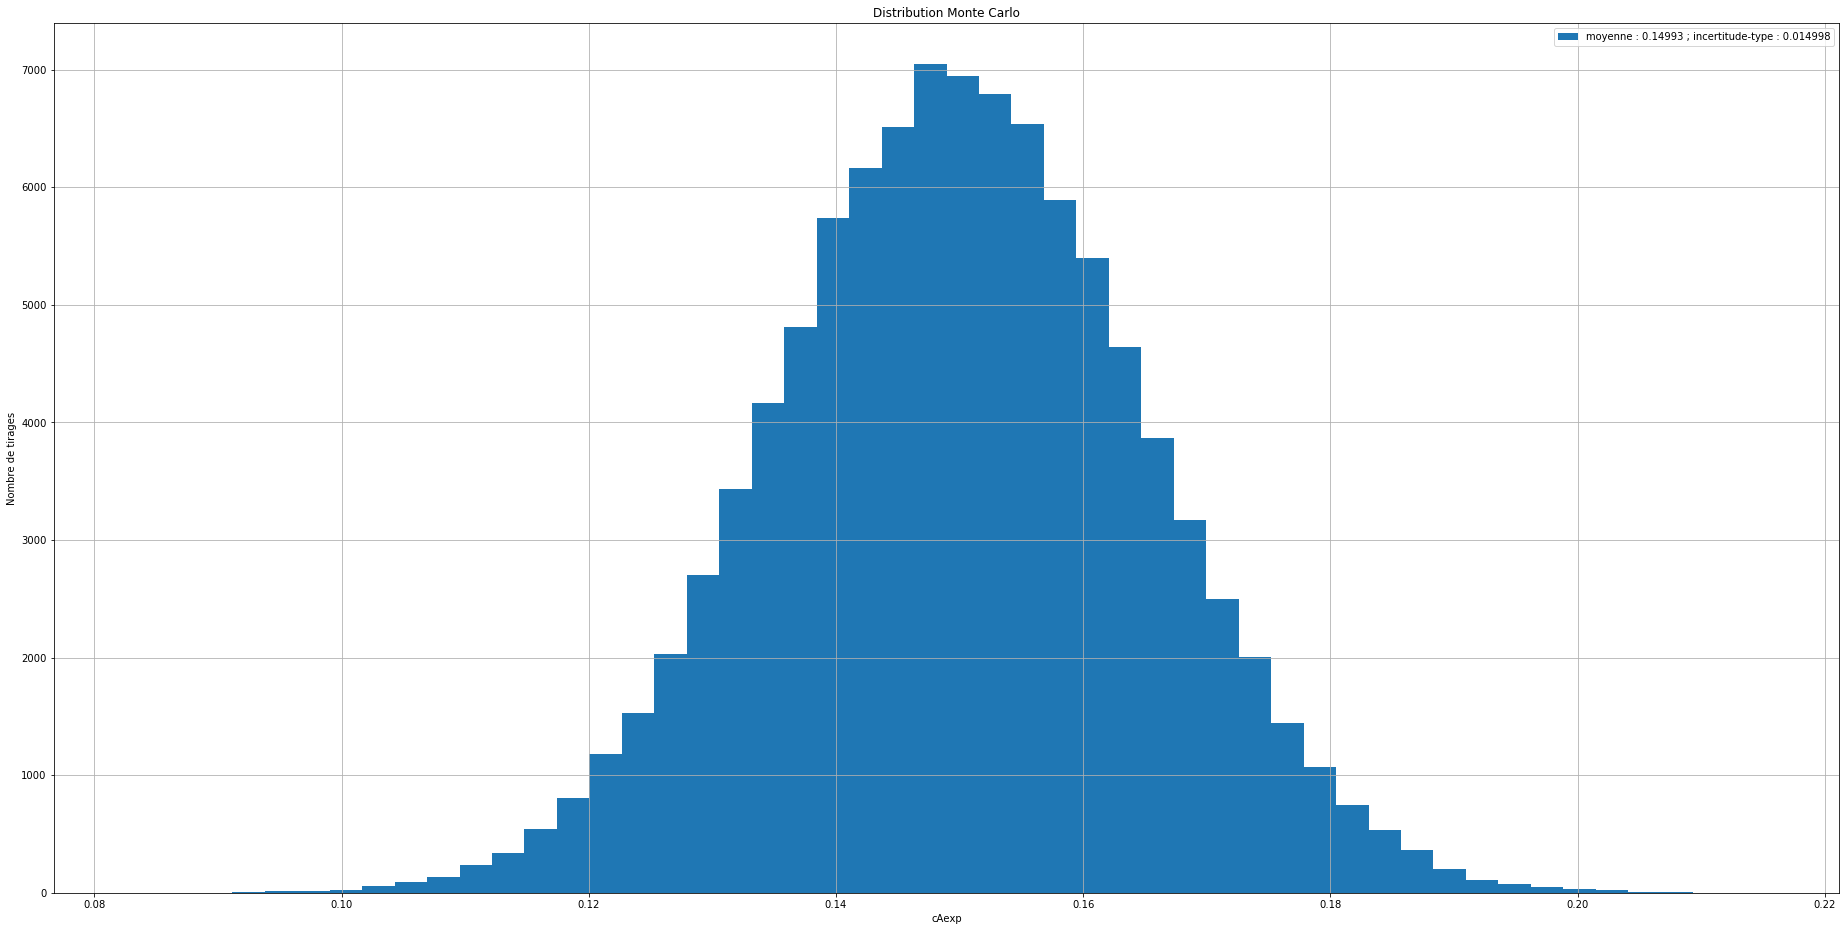

In [23]:
subplot(1, 1, 1)    # lignes, colonnes, numéro du graphique

hist(cAalea, bins=50, label=resultat)    # trace un histogramme à partir d'une série de mesures x ; options possibles : range=(,) et bins=nombre ou liste.

grid()    # ajoute une grille
legend()    # ajoute la légende au graphique
title("Distribution Monte Carlo")    # mettre le titre désiré entre les guillemets
xlabel("cAexp")    # mettre le nom de l'axe des abscisses entre les guillemets
ylabel("Nombre de tirages");    # mettre le nom de l'axe des ordonnées entre les guillemets. Le point-virgule final évite d'afficher un texte récapitulatif.


Comparaison avec les formules d'incertitudes composées :

In [8]:
cA = cB * VBE / VA
ucA = cA * sqrt((ucB / cB)**2 + (uVBE / VBE)**2 + (uVA / VA)**2)
print(f"valeur : {cA:.5} ; incertitude type : {ucA:.5}")

valeur : 0.15 ; incertitude type : 0.015011
